# Importing libs

In [113]:
import json
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from loguru import logger

## Loading json file

In [114]:
bari_file = None

try:
    with open("../data/Bari/3Bari10.json") as file:
        bari_file = json.load(file)
        if bari_file:
            logger.success("Succed on loading json file")
        print(bari_file)
except FileNotFoundError as error:
    logger.exception(error)

2024-08-06 12:47:54.115 | SUCCESS  | __main__:<module>:7 - Succed on loading json file


{'num_vertices': 13, 'demands': [0, -1, -3, -1, -3, 1, -4, -5, -1, -5, -1, -2, 5], 'vehicle_capacity': 10, 'distance_matrix': [[0.0, 2800.0, 2100.0, 1700.0, 1100.0, 3900.0, 1300.0, 3700.0, 3300.0, 3800.0, 1700.0, 2000.0, 600.0], [3000.0, 1000000000.0, 1200.0, 1200.0, 2100.0, 1400.0, 3800.0, 2000.0, 1800.0, 1400.0, 1700.0, 1600.0, 2500.0], [1800.0, 1400.0, 1000000000.0, 800.0, 900.0, 2400.0, 2600.0, 3300.0, 2400.0, 2400.0, 1000.0, 400.0, 1300.0], [1900.0, 1200.0, 600.0, 1000000000.0, 1000.0, 2200.0, 2900.0, 2900.0, 2800.0, 2200.0, 600.0, 1000.0, 1400.0], [1400.0, 2100.0, 1300.0, 900.0, 1000000000.0, 3100.0, 2300.0, 3800.0, 2800.0, 3100.0, 1000.0, 1300.0, 1100.0], [4600.0, 2100.0, 2800.0, 2900.0, 3700.0, 1000000000.0, 5400.0, 1600.0, 2900.0, 1000.0, 3400.0, 3200.0, 4100.0], [1600.0, 3300.0, 2500.0, 2100.0, 1200.0, 4200.0, 1000000000.0, 5000.0, 3800.0, 4200.0, 2200.0, 2400.0, 1300.0], [3600.0, 1900.0, 2900.0, 2900.0, 3800.0, 1000.0, 3800.0, 1000000000.0, 1300.0, 2000.0, 3400.0, 3100.0, 35

## Visualizing the distance matrix using pandas

In [115]:
distance_matrix = np.matrix(bari_file["distance_matrix"])
num_vertices = bari_file["num_vertices"]
df = pd.DataFrame(np.matrix(bari_file["distance_matrix"]))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,2.800000e+03,2.100000e+03,1.700000e+03,1.100000e+03,3.900000e+03,1.300000e+03,3.700000e+03,3.300000e+03,3.800000e+03,1.700000e+03,2.000000e+03,6.000000e+02
1,3000.0,1.000000e+09,1.200000e+03,1.200000e+03,2.100000e+03,1.400000e+03,3.800000e+03,2.000000e+03,1.800000e+03,1.400000e+03,1.700000e+03,1.600000e+03,2.500000e+03
2,1800.0,1.400000e+03,1.000000e+09,8.000000e+02,9.000000e+02,2.400000e+03,2.600000e+03,3.300000e+03,2.400000e+03,2.400000e+03,1.000000e+03,4.000000e+02,1.300000e+03
3,1900.0,1.200000e+03,6.000000e+02,1.000000e+09,1.000000e+03,2.200000e+03,2.900000e+03,2.900000e+03,2.800000e+03,2.200000e+03,6.000000e+02,1.000000e+03,1.400000e+03
4,1400.0,2.100000e+03,1.300000e+03,9.000000e+02,1.000000e+09,3.100000e+03,2.300000e+03,3.800000e+03,2.800000e+03,3.100000e+03,1.000000e+03,1.300000e+03,1.100000e+03
5,4600.0,2.100000e+03,2.800000e+03,2.900000e+03,3.700000e+03,1.000000e+09,5.400000e+03,1.600000e+03,2.900000e+03,1.000000e+03,3.400000e+03,3.200000e+03,4.100000e+03
6,1600.0,3.300000e+03,2.500000e+03,2.100000e+03,1.200000e+03,4.200000e+03,1.000000e+09,5.000000e+03,3.800000e+03,4.200000e+03,2.200000e+03,2.400000e+03,1.300000e+03
7,3600.0,1.900000e+03,2.900000e+03,2.900000e+03,3.800000e+03,1.000000e+03,3.800000e+03,1.000000e+09,1.300000e+03,2.000000e+03,3.400000e+03,3.100000e+03,3.500000e+03
8,3100.0,1.600000e+03,2.600000e+03,2.600000e+03,2.800000e+03,1.800000e+03,3.400000e+03,1.500000e+03,1.000000e+09,2.700000e+03,3.100000e+03,2.000000e+03,3.000000e+03
9,4200.0,1.500000e+03,2.700000e+03,2.300000e+03,3.200000e+03,6.000000e+02,4.500000e+03,1.500000e+03,2.000000e+03,1.000000e+09,2.800000e+03,3.000000e+03,3.700000e+03


## Ploting the graph of this city

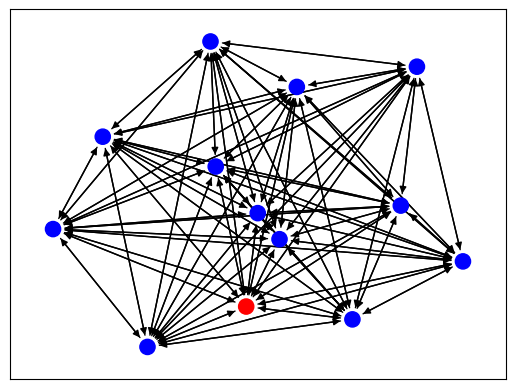

<Figure size 1980x1080 with 0 Axes>

In [116]:
G = nx.DiGraph()

for i in range(len(distance_matrix)):
    G.add_node(i)

for i in range(len(distance_matrix)):
    for j in range(len(distance_matrix)):
        if i != j and distance_matrix[i, j] < 1000000000.0:
            G.add_edge(i, j, weight=distance_matrix[i, j])

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(
    G,
    pos,
    label=True,
    cmap=plt.get_cmap("jet"),
    node_size=120,
    node_color=["red" if i == 0 else "blue" for i in range(num_vertices)]
)

nx.draw_networkx_edges(G, pos, arrows=True)

plt.figure(figsize=(19.8, 10.8))
plt.show()

## Setting the variables